### Imports  

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

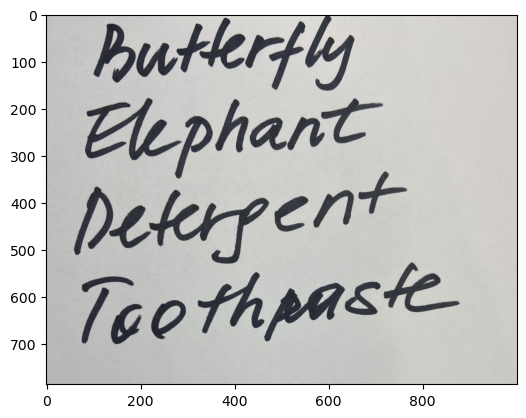

In [7]:
img = cv2.imread('test.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    new_w = 1000
    ar = w/h # aspect ratio
    new_h = int(new_w/ar)
    img = cv2.resize(img,(new_w,new_h),interpolation=cv2.INTER_AREA)
plt.imshow(img);

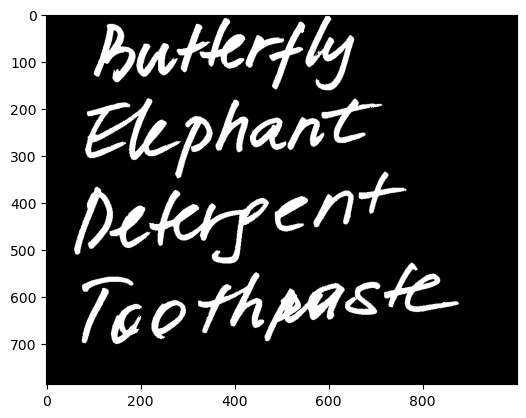

In [8]:
# define a function that will get us the threshold of the image
# convert image to greyscale
# <80 -> turns black
# take inverse binary of the image

def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh =cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

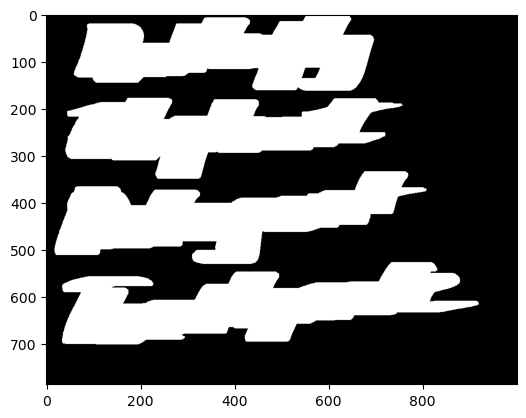

In [9]:
# dialation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')

In [10]:
#contours
(contours,heirarchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

sorted_contours_lines = sorted(contours,key=lambda ctr:cv2.boundingRect(ctr)[1]) # containg (x,y,w,h)


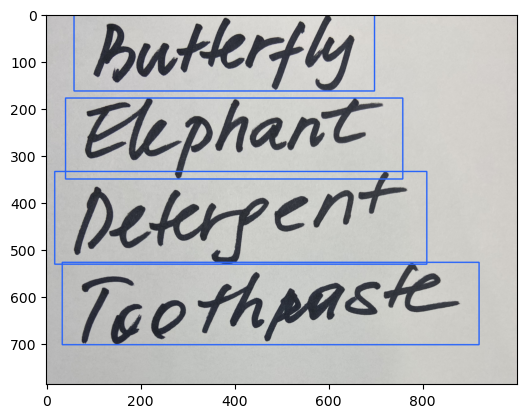

In [11]:
# make a copy of original image
img2 = img.copy()

# iterate each contour
for ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2,(x,y),(x+w,y+h),(40,100,250),2)
plt.imshow(img2);
    

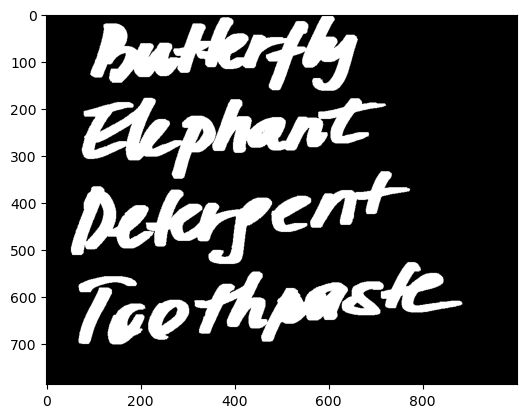

In [12]:
# findign contour of individual words in a sentence

#dilation
# dialation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations=1)
plt.imshow(dilated2, cmap='gray')

In [18]:
len(sorted_contours_lines)

4

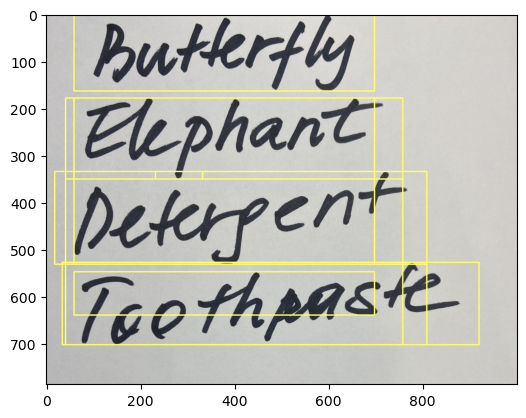

In [13]:
img3 = img.copy()
words_list = []
for line in sorted_contours_lines:
    #roi of each line
    x,y,w,h = cv2.boundingRect(line)
    roi_line = dilated[y:y+w,x:x+w]# dilated2 for letter segm or word in a line
    
    #draw contours on each word
    (cnt,heirarchy) = cv2.findContours(roi_line.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    sorted_countour_words = sorted(cnt,key=lambda cntr:cv2.boundingRect(cntr)[0])
    
    for word in sorted_countour_words:
        if cv2.contourArea(word) < 400:
            continue
            
        x2,y2,w2,h2 = cv2.boundingRect(word)
        words_list.append([x+x2,y+y2,x+x2+w2,y+y2+h2])
        cv2.rectangle(img3,(x+x2,y+y2),(x+x2+w2, y+y2+h2),(255,255,100),2)
        
    
plt.imshow(img3)
    

In [9]:
third_word =words_list[2]
third_word

[441, 145, 731, 269]

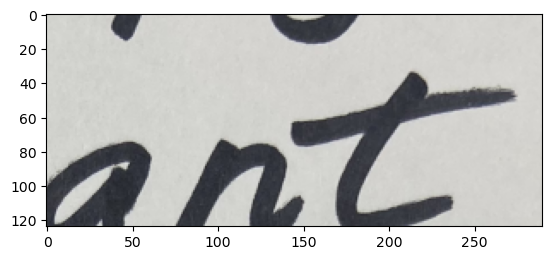

In [20]:
roi_2nd = img[third_word[1]:third_word[3],third_word[0]:third_word[2]]
plt.imshow(roi_2nd)

In [38]:
type(roi_2nd)

numpy.ndarray

In [41]:
entry = Image.fromarray(roi_2nd)
entry.save('entry.png')

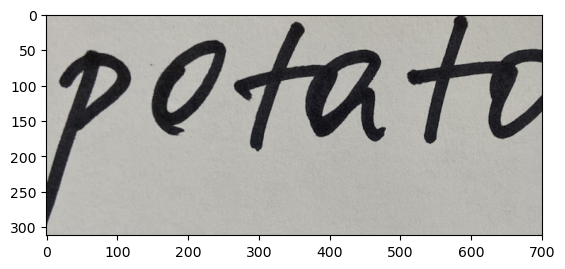

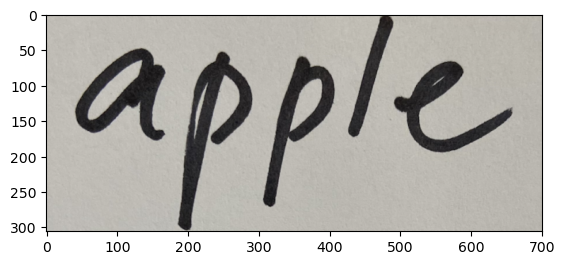

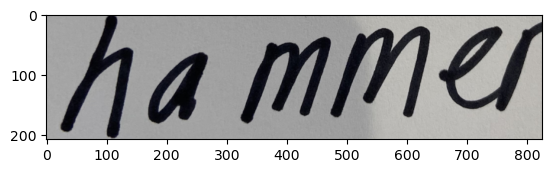

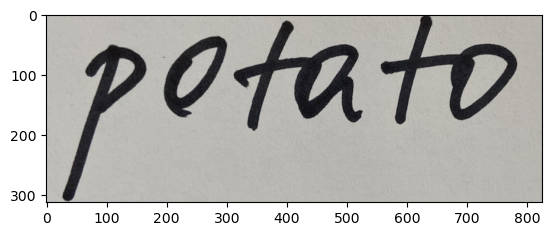

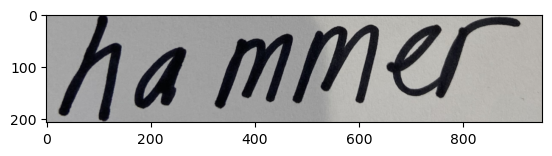

In [89]:
# This works, prints each word separate image.
# prints 5 instead of 3 due to repeating rectangles
from matplotlib.pyplot import imshow,show
n=0
for n in range(len(words_list[:])):
    for word in words_list:
        n_word = words_list[n] # run through n-th word in the list
        roi = img[n_word[1]:n_word[3],n_word[0]:n_word[2]]        
    imshow(roi)
    show()
    #print(n)

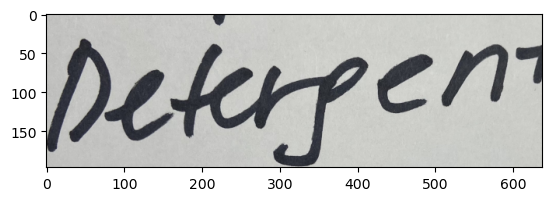

In [21]:
roi = img[words_list[1][1]:words_list[1][3],words_list[1][0]:words_list[1][2]]
plt.imshow(roi)

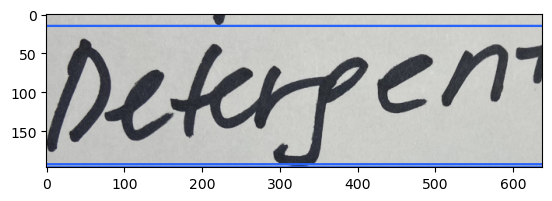

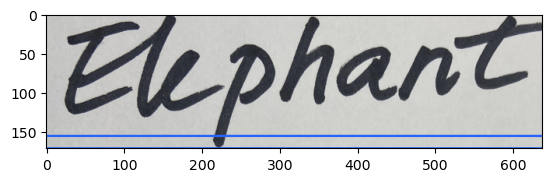

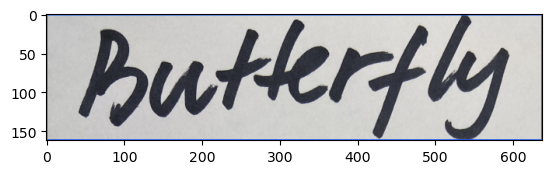

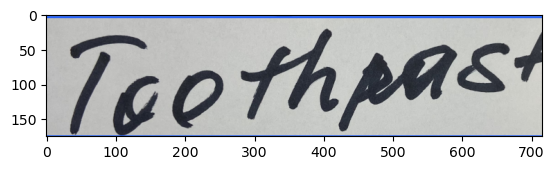

In [17]:
# effort to eliminate repeating entries. 
# make a copy of original image
img4 = img.copy()

# iterate each contour
for ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img4,(x,y),(x+w,y+h),(40,100,250),2)
#plt.imshow(img4);

from matplotlib.pyplot import imshow,show

line_list = []
for line in sorted_contours_lines:
    if cv2.contourArea(line)<400:
        continue
    #x2,y2,w2,h2 = cv2.boundingRect(line)
    line_list.append([x+x2,y+y2,x+x2+w2,y+y2+h2])

n=0
for n in range(len(line_list[:])):
    n=n+1
    for line in sorted_contours_lines:
        n_line = words_list[n] # run through n-th word in the list
        roi = img4[n_line[1]:n_line[3],n_line[0]:n_line[2]]        
    imshow(roi)
    show()
    entry = Image.fromarray(roi)
    entry.save(f"entry_{n}.png")
    #print(n)


